<a href="https://colab.research.google.com/github/prarthanaVengurlekar5/Time-Series-Analysis/blob/main/Stock_Price_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
! pip install yfinance

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow  as tf

In [68]:
df=yf.download('RELIANCE.NS')
df.head()  #Reliance Industries Limited (RELIANCE.NS)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302444,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300181,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214277,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233


In [69]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-07,2871.850098,2899.000000,2858.500000,2884.300049,2884.300049,4648284
2024-02-08,2900.000000,2918.949951,2855.050049,2900.250000,2900.250000,7347317
2024-02-09,2908.000000,2943.949951,2901.899902,2921.500000,2921.500000,6278399
2024-02-12,2921.500000,2922.000000,2884.699951,2904.699951,2904.699951,3337215
2024-02-13,2911.000000,2929.949951,2908.000000,2920.800049,2920.800049,771841


In [70]:
df=pd.DataFrame(df.Close)

In [71]:
df.head()

,Close
Date,
1996-01-01,14.691803
1996-01-02,14.577553
1996-01-03,14.688232
1996-01-04,14.552561
1996-01-05,14.452592


<Axes: xlabel='Date'>

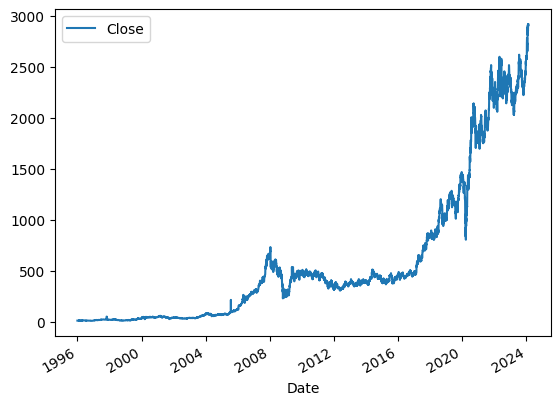

In [72]:
df.plot()

In [73]:
df.size-5

7061

In [74]:
train=df.iloc[:df.size-5]
test=df.iloc[df.size-5:]

In [75]:
train

,Close
Date,
1996-01-01,14.691803
1996-01-02,14.577553
1996-01-03,14.688232
1996-01-04,14.552561
1996-01-05,14.452592
...,...
2024-01-31,2853.250000
2024-02-01,2853.300049
2024-02-02,2915.399902


In [76]:
test

,Close
Date,
2024-02-07,2884.300049
2024-02-08,2900.250000
2024-02-09,2921.500000
2024-02-12,2904.699951
2024-02-13,2920.800049


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [78]:
scaler.fit(train)

MinMaxScaler()

In [79]:
scaled_train=scaler.transform(train)

In [80]:
scaled_train

array([[0.00127966],
       [0.00124033],
       [0.00127843],
       ...,
       [1.        ],
       [0.98714036],
       [0.97941079]])

In [81]:
scaled_test=scaler.transform(test)

In [82]:
scaled_test

array([[0.98929225],
       [0.99478385],
       [1.00210028],
       [0.99631598],
       [1.00185928]])

In [83]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
n_inputs=5
n_feature=1

In [85]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=n_feature)

In [86]:
scaled_train[:7]

array([[0.00127966],
       [0.00124033],
       [0.00127843],
       [0.00123172],
       [0.0011973 ],
       [0.00099816],
       [0.00086048]])

In [87]:
generator[0]

(array([[[0.00127966],
         [0.00124033],
         [0.00127843],
         [0.00123172],
         [0.0011973 ]]]),
 array([[0.00099816]]))

In [88]:
x=generator[0][0]

In [89]:
y=generator[0][1]

In [90]:
y

array([[0.00099816]])

In [91]:
x

array([[[0.00127966],
        [0.00124033],
        [0.00127843],
        [0.00123172],
        [0.0011973 ]]])

In [92]:
scaled_train[:5]

array([[0.00127966],
       [0.00124033],
       [0.00127843],
       [0.00123172],
       [0.0011973 ]])

In [93]:
scaled_train[5]

array([0.00099816])

In [94]:
y

array([[0.00099816]])

In [95]:
x.shape

(1, 5, 1)

In [96]:
y.shape

(1, 1)

In [97]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [98]:
model=Sequential()
model.add(LSTM(128,input_shape=(n_inputs,n_feature),return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_4 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 342209 (1.31 MB)
Trainable params: 34220

In [100]:
model.compile(optimizer='adam',loss='mse')

In [101]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='loss',patience=5)

model.fit(generator,epochs=10,callbacks=[callback])

Epoch 1/10
7056/7056 [==============================] - 135s 18ms/step - loss: 0.0016
Epoch 2/10
7056/7056 [==============================] - 127s 18ms/step - loss: 5.6559e-04
Epoch 3/10
7056/7056 [==============================] - 126s 18ms/step - loss: 3.5113e-04
Epoch 4/10
7056/7056 [==============================] - 126s 18ms/step - loss: 2.6846e-04
Epoch 5/10
7056/7056 [==============================] - 127s 18ms/step - loss: 2.1080e-04
Epoch 6/10
7056/7056 [==============================] - 128s 18ms/step - loss: 1.9344e-04
Epoch 7/10
7056/7056 [==============================] - 126s 18ms/step - loss: 1.6449e-04
Epoch 8/10
7056/7056 [==============================] - 126s 18ms/step - loss: 1.8264e-04
Epoch 9/10
7056/7056 [==============================] - 125s 18ms/step - loss: 1.4676e-04
Epoch 10/10
7056/7056 [==============================] - 127s 18ms/step - loss: 1.4626e-04


In [102]:
model.history.history

{'loss': [0.001559586264193058,
  0.0005655857967212796,
  0.00035112802288495004,
  0.00026846356922760606,
  0.0002108029293594882,
  0.00019344141765031964,
  0.00016448571113869548,
  0.00018263993842992932,
  0.00014675836428068578,
  0.00014625817129854113]}

In [103]:
scaled_train[-5:]

array([[0.97860165],
       [0.97861888],
       [1.        ],
       [0.98714036],
       [0.97941079]])

In [104]:
first_eval_batch=scaled_train[-5:]

In [105]:
first_eval_batch

array([[0.97860165],
       [0.97861888],
       [1.        ],
       [0.98714036],
       [0.97941079]])

In [106]:
X_train,y_train=generator[0]

In [107]:
X_train.shape

(1, 5, 1)

In [108]:
X_train

array([[[0.00127966],
        [0.00124033],
        [0.00127843],
        [0.00123172],
        [0.0011973 ]]])

In [109]:
first_eval_batch.shape

(5, 1)

In [110]:
first_eval_batch=first_eval_batch.reshape(1,n_inputs,n_feature)

In [111]:
first_eval_batch.shape

(1, 5, 1)

In [112]:
model.predict(first_eval_batch)

1/1 [==============================] - 2s 2s/step


array([[0.95740867]], dtype=float32)

In [113]:
scaled_test[-5:]

array([[0.98929225],
       [0.99478385],
       [1.00210028],
       [0.99631598],
       [1.00185928]])

In [114]:
first_eval_batch[:,1:,:].shape

(1, 4, 1)

In [115]:
my_pred=[]
first_eval_batch=scaled_train[-n_inputs:]
current_batch=first_eval_batch.reshape(1,n_inputs,n_feature)
current_batch

array([[[0.97860165],
        [0.97861888],
        [1.        ],
        [0.98714036],
        [0.97941079]]])

In [116]:
model.predict(current_batch)

1/1 [==============================] - 0s 53ms/step


array([[0.95740867]], dtype=float32)

In [117]:
pred=model.predict(current_batch)

1/1 [==============================] - 0s 38ms/step


In [118]:
current_batch[:,1:,:]

array([[[0.97861888],
        [1.        ],
        [0.98714036],
        [0.97941079]]])

In [119]:
[[pred[0]]]

[[array([0.95740867], dtype=float32)]]

In [120]:
current_batch=np.append(current_batch[:,1:,:],[[pred[0]]],axis=1)

In [121]:
current_batch

array([[[0.97861888],
        [1.        ],
        [0.98714036],
        [0.97941079],
        [0.95740867]]])

In [122]:
current_batch.shape

(1, 5, 1)

In [123]:
my_pred=[]
first_eval_batch=scaled_train[-n_inputs:]
current_batch=first_eval_batch.reshape(1,n_inputs,n_feature)

for i in range(n_inputs):
    pred=model.predict(current_batch)[0]
    my_pred.append(pred)
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 43ms/step


In [124]:
pred_val=scaler.inverse_transform(my_pred)

In [125]:
pred_val

array([[2791.69657795],
       [2726.11752916],
       [2651.44653774],
       [2578.385017  ],
       [2519.46145925]])

In [126]:
test

,Close
Date,
2024-02-07,2884.300049
2024-02-08,2900.250000
2024-02-09,2921.500000
2024-02-12,2904.699951
2024-02-13,2920.800049


In [127]:
test['pred']=pred_val

<ipython-input-127-b4d052856a9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred']=pred_val


In [128]:
test['%error']=((test['Close']-test['pred'])/test['Close'])*100

<ipython-input-128-d280a033d411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['%error']=((test['Close']-test['pred'])/test['Close'])*100


<Axes: xlabel='Date'>

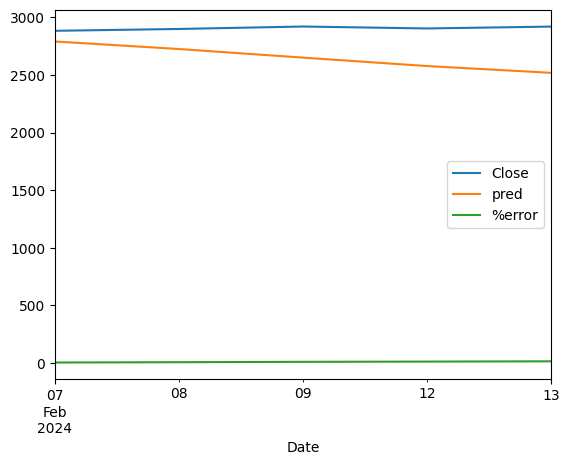

In [129]:
test.plot()

In [130]:
test


,Close,pred,%error
Date,,,
2024-02-07,2884.300049,2791.696578,3.210605
2024-02-08,2900.250000,2726.117529,6.004050
2024-02-09,2921.500000,2651.446538,9.243658
2024-02-12,2904.699951,2578.385017,11.234032
2024-02-13,2920.800049,2519.461459,13.740707
